Nama: Filbert Naldo Wijaya

NIM: 2702235696

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data

df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploratory Data Analysis (EDA)

1. Conduct a descriptive analysis to understand the features within the dataset, such as 'age', 'sex', 'pclass', among others. Identify the distribution of data and any patterns that may exist.
2. Visualize the data to uncover relationships between features using diagrams such as histograms, box plots, and scatter plots.
3. Find and explain any interesting insights from the data that might be useful for predicting passenger survival.

In [ ]:
# Descriptive analysis of age

df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


Insight: Rata-rata usia penumpang kapal Titanic adalah 29.7 tahun, dengan range dari 0.42 sampai 80 tahun.

In [ ]:
# calculate the survival count and percentage by gender using cross tabulation

survive_by_gender = df.groupby(["Sex", "Survived"]).size().reset_index(name="Count")

gender_count = df["Sex"].value_counts()

survival_percentage = survive_by_gender[survive_by_gender["Survived"] == 1].set_index("Sex")["Count"] / gender_count * 100
survival_percentage = survival_percentage.map(lambda x: f"{round(x, 3)} %")

print("Survival Count by Gender:\n", survive_by_gender)
print("\nSurvival Rate by Gender:\n", survival_percentage)

Survival Count by Gender:
       Sex  Survived  Count
0  female         0     81
1  female         1    233
2    male         0    468
3    male         1    109

Survival Rate by Gender:
 Sex
female    74.204 %
male      18.891 %
dtype: object


Insight:
Penumpang dengan gender perempuan mempunyai persentase survive lebih tinggi yaitu sebesar 74.204 %, daripada laki-laki yaitu hanya sebesar 18.891 %.

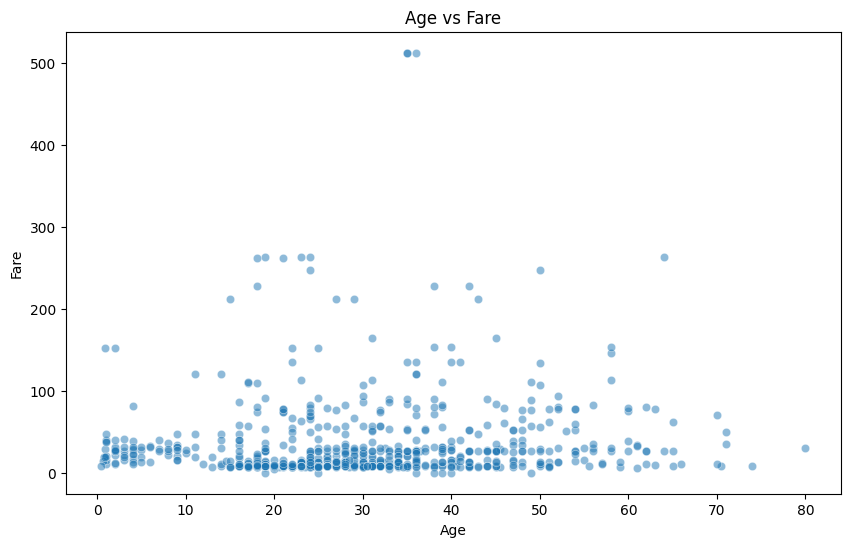

In [ ]:
# Scatterplot to see is there any correlation between age and fare

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Age"], y=df["Fare"], alpha=0.5)
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

Insight:

Mayoritas fare yang dibayar oleh penumpang tergolong rendah.

Terdapat outlier pada fare, di mana terdapat penumpang  membayar fare yang sangat mahal

Berdasarkan scatterplot, tidak ada korelasi/hubungan antara usia dan fare. Fare terdistribusi secara random tanpa memandang usia penumpang.


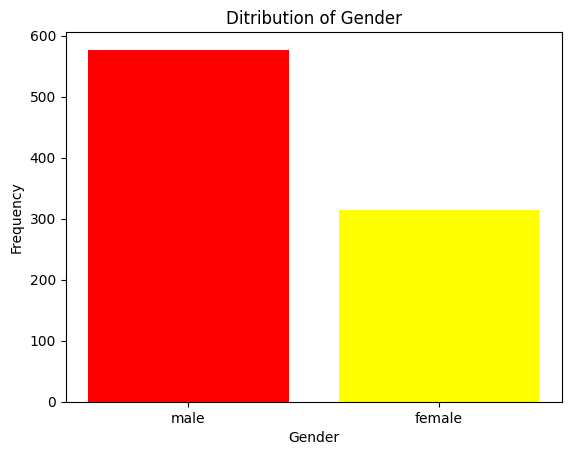

In [ ]:
# Show the distribution of gender

gender_counts = df['Sex'].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color=['red', 'yellow'])
plt.title("Ditribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

Insight: Mayoritas penumpang kapal Titanic adalah laki-laki.

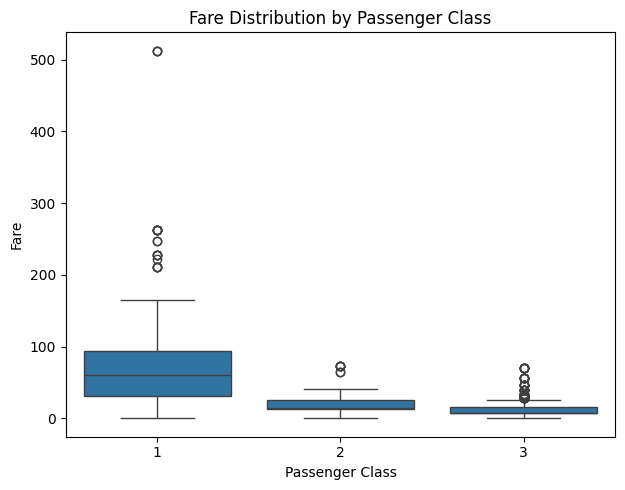

In [ ]:
# Boxplot of fare grouped by passenger class

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.tight_layout()
plt.show()

Insight:

Median fare dari class 1 (First Class) jauh lebih tinggi dari 2 kelas lainnya. Hal ini menunjukkan adanya perbedaan yang jelas dalam ticket pricing.

Class 1 mempunyai IQR yang lumayan besar. Artinya harga tiket di class 1 sangat bervariasi. Berbeda dengan class 2 dan 3 yang IQRnya lumayan kecil, artinya pada class 2 dan 3 variasi harga tiketnya lebih sedikit.

Tiap class mempunyai outlier, artinya ada penumpang yang membayar fare dengan harga di atas standar per class. Class 1 mempunyai outlier yang sangat tinggi/jauh, artinya ada penumpang class 1 yang membayar fare sangat mahal.

# Data Preprocessing

1. Clean the data by handling missing values. Determine your strategy for filling in missing data or removing rows/columns if necessary.
2. Perform encoding on categorical features and explain why you chose a specific type of encoding.
3. Normalize or standardize numerical features that you deem necessary, and explain the reason for your choice of method.

In [ ]:
# check data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# check sum of missing values for each column

df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# check if there is duplicate values

df.duplicated().sum()

0

In [ ]:
# describe data

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Cleaning

In [ ]:
# filling missing values in column 'Age' using median

df['Age'] = df['Age'].fillna(value=df['Age'].median())

In [ ]:
# filling missing values in column 'Cabin' by filling them with value 'Unknown'

df['Cabin'] = df['Cabin'].fillna(value="Unknown")

In [ ]:
# filling missing values in column 'Embarked' using mode (modus)

df['Embarked'] = df['Embarked'].fillna(value=df["Embarked"].mode()[0])

In [ ]:
df.info() # no missing values already

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Perform Encoding on Categorical Features

In [ ]:
# encode 'Sex' column
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

Untuk 'Sex' saya menggunakan Label Encoding, karena 'Sex' hanya punya 2 kategori (binary) yaitu male dan female sehingga bisa encode dengan 2 value yaitu 0 dan 1.

In [ ]:
# encode 'Embarked' column
df["Embarked_Q"] = (df["Embarked"] == "Q").astype(int)
df["Embarked_S"] = (df["Embarked"] == "S").astype(int)
df.drop(columns=["Embarked"], inplace=True)

Untuk 'Embarked' saya menggunakan One-Hot Encoding karena column ini mempunyai 3 unique categorical value yaitu C, Q, dan S di mana 3 value ini tidak ada order/rank tertentu (tidak ada port yang paling bagus/paling buruk).

In [ ]:
df # after encoding

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,Unknown,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,Unknown,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0,0


Normalization/Standardization

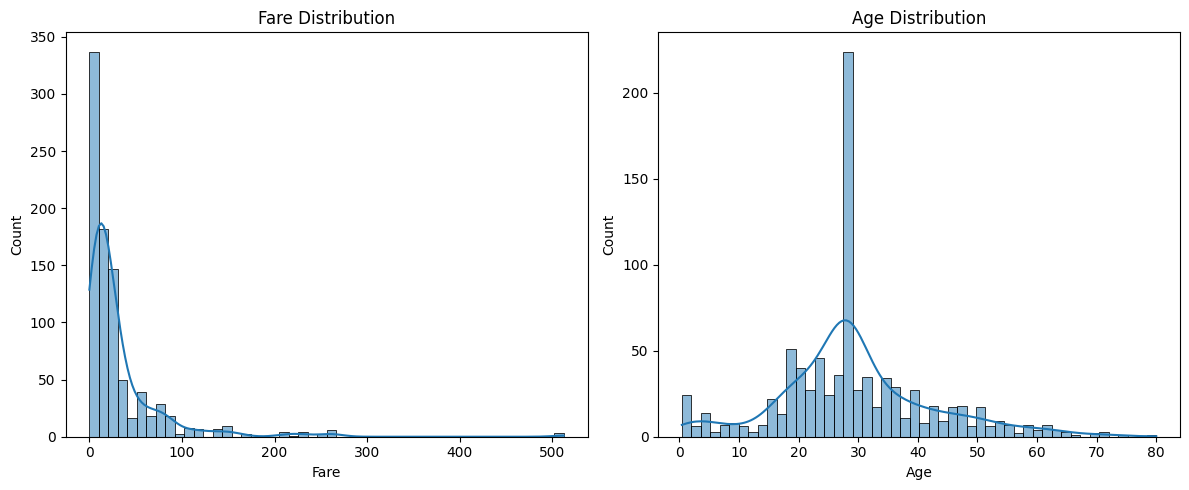

In [ ]:
# Visualize 'Fare' and 'Age' distribution

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Fare Distribution
sns.histplot(df["Fare"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Fare Distribution")

# Age Distribution
sns.histplot(df["Age"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Age Distribution")

plt.tight_layout()
plt.show()

Fare: right skewed distribution dan ada outlier yang sangat jauh/besar, maka terapkan MinMax Normalization

Age: Normal distribution, maka terapkan Z-Score Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalize 'Fare'
scaler_fare = MinMaxScaler()
df["Fare"] = scaler_fare.fit_transform(df[["Fare"]])

# Standardize 'Age'
scaler_age = StandardScaler()
df["Age"] = scaler_age.fit_transform(df[["Age"]])

In [ ]:
df # after normalization/standardization

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,1,0,A/5 21171,0.014151,Unknown,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.663861,1,0,PC 17599,0.139136,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,0,0,STON/O2. 3101282,0.015469,Unknown,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,1,0,113803,0.103644,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,0,0,373450,0.015713,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,-0.181487,0,0,211536,0.025374,Unknown,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,-0.796286,0,0,112053,0.058556,B42,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,-0.104637,1,2,W./C. 6607,0.045771,Unknown,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,-0.258337,0,0,111369,0.058556,C148,0,0


## Additional

Data Reduction

In [ ]:
updated_df = df.drop(columns=["Name", "Ticket", "Cabin"])

updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_Q   891 non-null    int64  
 9   Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [ ]:
updated_df # final data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,-0.565736,1,0,0.014151,0,1
1,2,1,1,1,0.663861,1,0,0.139136,0,0
2,3,1,3,1,-0.258337,0,0,0.015469,0,1
3,4,1,1,1,0.433312,1,0,0.103644,0,1
4,5,0,3,0,0.433312,0,0,0.015713,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,-0.181487,0,0,0.025374,0,1
887,888,1,1,1,-0.796286,0,0,0.058556,0,1
888,889,0,3,1,-0.104637,1,2,0.045771,0,1
889,890,1,1,0,-0.258337,0,0,0.058556,0,0
